In [189]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from geopy.geocoders import Nominatim
import plotly.express as px
from gapminder import gapminder 
import sweetviz as sv
 
salary=pd.read_csv(r"./base_etablissement_par_tranche_effectif.csv")

In [190]:
salary.head()

CODGEO                   LIBGEO  REG DEP  E14TST  E14TS0ND  E14TS1  E14TS6  \
0  01001  L'Abergement-Clémenciat   82  01      25        22       1       2   
1  01002    L'Abergement-de-Varey   82  01      10         9       1       0   
2  01004        Ambérieu-en-Bugey   82  01     996       577     272      63   
3  01005      Ambérieux-en-Dombes   82  01      99        73      20       3   
4  01006                  Ambléon   82  01       4         4       0       0   

   E14TS10  E14TS20  E14TS50  E14TS100  E14TS200  E14TS500  
0        0        0        0         0         0         0  
1        0        0        0         0         0         0  
2       46       24        9         3         2         0  
3        1        2        0         0         0         0  
4        0        0        0         0         0         0

In [191]:
salary.shape

(36681, 14)

In [192]:
# show null/NA values per column
salary.isnull().sum()

CODGEO      0
LIBGEO      0
REG         0
DEP         0
E14TST      0
E14TS0ND    0
E14TS1      0
E14TS6      0
E14TS10     0
E14TS20     0
E14TS50     0
E14TS100    0
E14TS200    0
E14TS500    0
dtype: int64

In [193]:
salary.dtypes

CODGEO      object
LIBGEO      object
REG          int64
DEP         object
E14TST       int64
E14TS0ND     int64
E14TS1       int64
E14TS6       int64
E14TS10      int64
E14TS20      int64
E14TS50      int64
E14TS100     int64
E14TS200     int64
E14TS500     int64
dtype: object

In [194]:
#finding duplicates rows
salary.duplicated().sum()

0

In [195]:
from pandas_profiling import ProfileReport
profile = ProfileReport(salary, title='Comnpanies per french cities', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [196]:
my_report = sv.analyze(salary, target_feat ='E14TST')
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Correlation

In [197]:
corr = salary.corr()
corr.style.background_gradient (cmap = 'coolwarm')

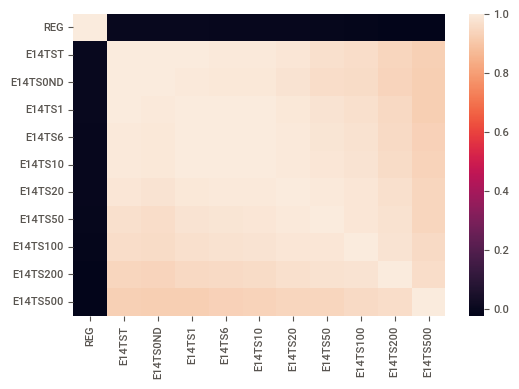

In [198]:
sns.heatmap(salary.corr());

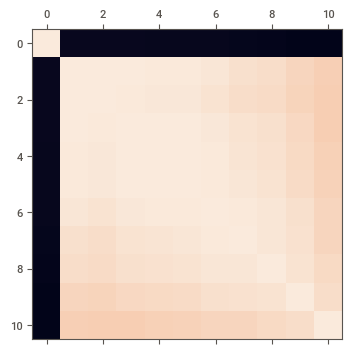

In [199]:
plt.matshow(salary.corr())
plt.show()

In [200]:
"""
CODGEO : geographique code for the town (can be joined with codeinsee column from "namegeographic_information.csv')
LIBGEO : name of the town (in french)
REG : region number
DEP : depatment number
E14TST : total number of firms in the town
E14TS0ND : number of unknown or null size firms in the town
E14TS1 : number of firms with 1 to 5 employees in the town
E14TS6 : number of firms with 6 to 9 employees in the town
E14TS10 : number of firms with 10 to 19 employees in the town
E14TS20 : number of firms with 20 to 49 employees in the town
E14TS50 : number of firms with 50 to 99 employees in the town
E14TS100 : number of firms with 100 to 199 employees in the town
E14TS200 : number of firms with 200 to 499 employees in the town
E14TS500 : number of firms with more than 500 employees in the town

"""

'\nCODGEO : geographique code for the town (can be joined with codeinsee column from "namegeographic_information.csv\')\nLIBGEO : name of the town (in french)\nREG : region number\nDEP : depatment number\nE14TST : total number of firms in the town\nE14TS0ND : number of unknown or null size firms in the town\nE14TS1 : number of firms with 1 to 5 employees in the town\nE14TS6 : number of firms with 6 to 9 employees in the town\nE14TS10 : number of firms with 10 to 19 employees in the town\nE14TS20 : number of firms with 20 to 49 employees in the town\nE14TS50 : number of firms with 50 to 99 employees in the town\nE14TS100 : number of firms with 100 to 199 employees in the town\nE14TS200 : number of firms with 200 to 499 employees in the town\nE14TS500 : number of firms with more than 500 employees in the town\n\n'

Changing the columns names and method Describe

In [201]:
salary.rename(columns={'CODGEO':'codgeo'}, inplace=True)
salary.rename(columns={'LIBGEO':'name_town'}, inplace=True)
salary.rename(columns={'REG':'reg'}, inplace=True)
salary.rename(columns={'DEP':'dep'}, inplace=True)
salary.rename(columns={'E14TST':'total_firms'}, inplace=True)
salary.rename(columns={'E14TS0ND':'null_size_firm'}, inplace=True)
salary.rename(columns={'E14TS1':'firm_1_5'}, inplace=True)
salary.rename(columns={'E14TS6':'firm_6_9'}, inplace=True)
salary.rename(columns={'E14TS10':'firm_10_19'}, inplace=True)
salary.rename(columns={'E14TS20':'firm_20_49'}, inplace=True)
salary.rename(columns={'E14TS50':'firm_50_99'}, inplace=True)
salary.rename(columns={'E14TS100':'firm_100_199'}, inplace=True)
salary.rename(columns={'E14TS200':'firm_199_499'}, inplace=True)
salary.rename(columns={'E14TS500':'firm_500'}, inplace=True)

In [202]:
salary.describe()

reg    total_firms  null_size_firm      firm_1_5  \
count  36681.000000   36681.000000    36681.000000  36681.000000   
mean      49.415365     123.456067       83.555301     27.291486   
std       25.451207    2353.384846     1729.874812    432.062116   
min        1.000000       0.000000        0.000000      0.000000   
25%       25.000000       8.000000        6.000000      1.000000   
50%       43.000000      19.000000       14.000000      3.000000   
75%       73.000000      54.000000       39.000000     11.000000   
max       94.000000  427385.000000   316603.000000  76368.000000   

           firm_6_9    firm_10_19    firm_20_49    firm_50_99  firm_100_199  \
count  36681.000000  36681.000000  36681.000000  36681.000000  36681.000000   
mean       5.220550      3.800333      2.296448      0.738339      0.332434   
std       83.685519     60.961216     32.597382      9.882131      4.850211   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.000000      1.000000      1.000000      0.000000      0.000000   
max    14836.000000  10829.000000   5643.000000   1658.000000    812.000000   

       firm_199_499      firm_500  
count  36681.000000  36681.000000  
mean       0.172760      0.048417  
std        2.783668      1.091031  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      456.000000    180.000000

Creating four new columns:
- %_non_info: to represent the % of unknown size of the company
- Small co: to group the companies by size 1 to 20 employees
- Med co: to group the companies by size 20 to 200 employees
- Big co: to group the companies by size 200 to 500 employees

In [203]:
salary['%_non_info'] = salary['null_size_firm']/salary['total_firms']
salary['small_co']= salary['firm_1_5']+salary['firm_6_9']+salary['firm_10_19']
salary['med_co']= salary['firm_20_49']+salary['firm_50_99']+salary['firm_100_199']
salary['big_co']= salary['firm_199_499']+salary['firm_500']
salary.head()

codgeo                name_town  reg dep  total_firms  null_size_firm  \
0  01001  L'Abergement-Clémenciat   82  01           25              22   
1  01002    L'Abergement-de-Varey   82  01           10               9   
2  01004        Ambérieu-en-Bugey   82  01          996             577   
3  01005      Ambérieux-en-Dombes   82  01           99              73   
4  01006                  Ambléon   82  01            4               4   

   firm_1_5  firm_6_9  firm_10_19  firm_20_49  firm_50_99  firm_100_199  \
0         1         2           0           0           0             0   
1         1         0           0           0           0             0   
2       272        63          46          24           9             3   
3        20         3           1           2           0             0   
4         0         0           0           0           0             0   

   firm_199_499  firm_500  %_non_info  small_co  med_co  big_co  
0             0         0    0.880000         3       0       0  
1             0         0    0.900000         1       0       0  
2             2         0    0.579317       381      36       2  
3             0         0    0.737374        24       2       0  
4             0         0    1.000000         0       0       0

In [204]:
#group by mean of total firms to know which cities have the greatest number of companies in the city
name_max = salary.groupby(['name_town']).agg({"total_firms" :"mean"})
name_max.sort_values(['total_firms'], ascending = False)[:10]

total_firms
name_town               
Paris           427385.0
Marseille        68332.0
Lyon             49756.0
Nice             39314.0
Toulouse         36823.0
Bordeaux         26116.0
Montpellier      24508.0
Nantes           22585.0
Strasbourg       20882.0
Lille            19787.0

In [205]:
#Displaying the mean of companies by dep, grouping by reg (to know the reg). 10 top
best_Dep= salary.pivot_table(index=["reg","dep"], values=["total_firms"], aggfunc="mean")
best_Dep.sort_values(['total_firms'],ascending=False)[:10]

total_firms
reg dep               
11  75   427385.000000
    92     3653.555556
    93     2503.275000
4   974    2227.291667
11  94     1763.702128
1   971    1484.843750
93  13     1385.571429
2   972    1135.176471
93  06      761.950920
3   973     659.045455

In [206]:
#Displaying the mean of companies by dep, grouping by reg (to know the reg). 10 top
worst_dep= salary.pivot_table(index=["reg","dep"], values=["total_firms"], aggfunc="mean")
worst_dep.sort_values(['total_firms'],ascending=False)[-10:]

total_firms
reg dep             
91  48     30.708108
73  32     30.611231
25  61     30.554455
21  08     30.352052
43  39     29.500000
22  02     28.447304
74  23     27.861538
43  70     21.777982
21  52     20.784897
41  55     17.448000

In [207]:
#Looking for the cities where the companies have largest number of employees 
big_co_cit= salary.pivot_table(index=["name_town",'dep'], values=["big_co"], aggfunc="mean")
big_co_cit.sort_values(['big_co'],ascending=False)[:10]

big_co
name_town            dep        
Paris                75      636
Lyon                 69      119
Marseille            13      102
Puteaux              92       94
Toulouse             31       93
Courbevoie           92       89
Boulogne-Billancourt 92       76
Saint-Denis          93       61
Levallois-Perret     92       57
Nanterre             92       54

In [208]:
#Looking for the cities where the companies have smallers number of employees 
small_co_cit= salary.pivot_table(index=["name_town",'dep'], values=["small_co"], aggfunc="mean")
small_co_cit.sort_values(['small_co'],ascending=False)[:10]

small_co
name_town   dep          
Paris       75     102033
Marseille   13      18299
Lyon        69      15148
Toulouse    31      11032
Nice        06      10357
Bordeaux    33       7625
Strasbourg  67       6645
Nantes      44       6454
Montpellier 34       6419
Lille       59       6022

In [209]:
#Looking for the cities where the companies have smallers number of employees 
med_co_cit= salary.pivot_table(index=["name_town",'dep'], values=["med_co"], aggfunc="mean")
med_co_cit.sort_values(['med_co'],ascending=False)[:10]

med_co
name_town       dep        
Paris           75     8113
Lyon            69     1442
Marseille       13     1374
Toulouse        31     1114
Nantes          44      698
Bordeaux        33      639
Strasbourg      67      585
Nice            06      580
Aix-en-Provence 13      578
Lille           59      569

<AxesSubplot:xlabel='total_firms', ylabel='total_firms'>

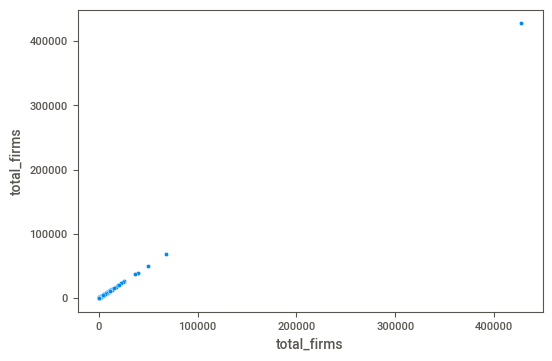

In [210]:
#to explain that we have a huge difference between Paris and the rest of the cities
sns.scatterplot(data=salary, x='total_firms', y='total_firms')

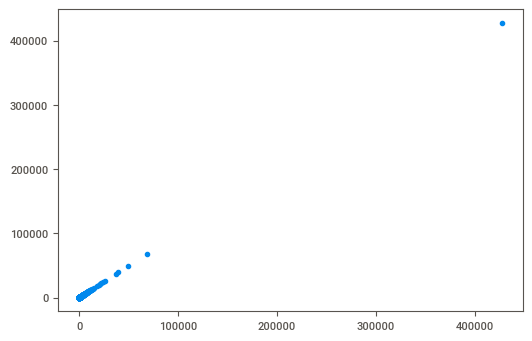

In [211]:
plt.scatter(data=salary, x='total_firms', y='total_firms')

In [212]:
salary_file = gpd.read_file(r"./base_etablissement_par_tranche_effectif.csv")

Cities with the highest number of companies in France

In [213]:
top_city = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(10).index][['name_town', 'total_firms']]
top_city


name_town  total_firms
30784        Paris       427385
4453     Marseille        68332
28522         Lyon        49756
2014          Nice        39314
12418     Toulouse        36823
12981     Bordeaux        26116
13633  Montpellier        24508
17075       Nantes        22585
27951   Strasbourg        20882
23381        Lille        19787

<AxesSubplot:xlabel='total_firms', ylabel='Count'>

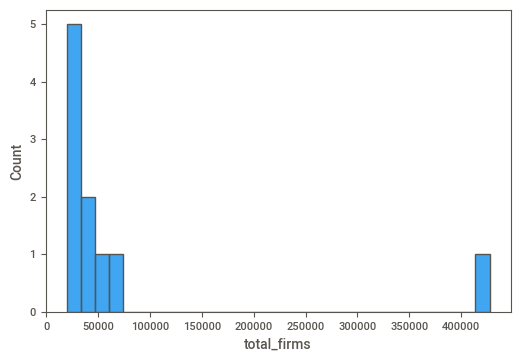

In [214]:
# How many cities have the same number of companies (aprox)?
sns.histplot(data=top_city, x="total_firms", bins=30)


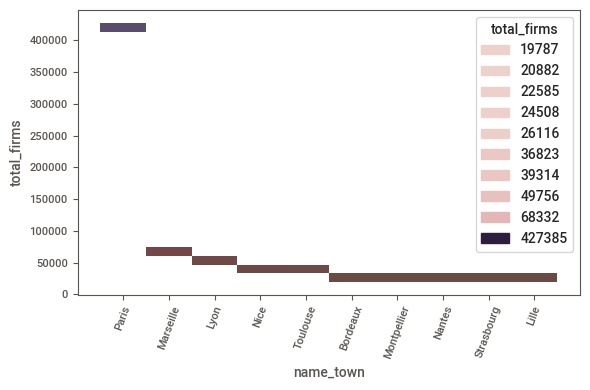

In [215]:
#Showing the huge difference we have between PAris and the rest of the cities
sns.histplot(data=top_city, x="name_town", y="total_firms", hue="total_firms",bins=30)
plt.xticks(rotation=70)
plt.tight_layout()

In [216]:
geolocator = Nominatim(user_agent='your unique UA')
top_city['city_coord'] = top_city['name_town'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
top_city


name_town  total_firms                        city_coord
30784        Paris       427385  (48.8588897, 2.3200410217200766)
4453     Marseille        68332           (43.2961743, 5.3699525)
28522         Lyon        49756           (45.7578137, 4.8320114)
2014          Nice        39314           (43.7009358, 7.2683912)
12418     Toulouse        36823           (43.6044622, 1.4442469)
12981     Bordeaux        26116           (44.841225, -0.5800364)
13633  Montpellier        24508           (43.6112422, 3.8767337)
17075       Nantes        22585          (47.2186371, -1.5541362)
27951   Strasbourg        20882            (48.584614, 7.7507127)
23381        Lille        19787           (50.6365654, 3.0635282)

In [217]:
top_city['lat'] = top_city['city_coord'].apply(lambda x: x[0])
top_city['long'] = top_city['city_coord'].apply(lambda x: x[1])

In [218]:
top_city

name_town  total_firms                        city_coord        lat  \
30784        Paris       427385  (48.8588897, 2.3200410217200766)  48.858890   
4453     Marseille        68332           (43.2961743, 5.3699525)  43.296174   
28522         Lyon        49756           (45.7578137, 4.8320114)  45.757814   
2014          Nice        39314           (43.7009358, 7.2683912)  43.700936   
12418     Toulouse        36823           (43.6044622, 1.4442469)  43.604462   
12981     Bordeaux        26116           (44.841225, -0.5800364)  44.841225   
13633  Montpellier        24508           (43.6112422, 3.8767337)  43.611242   
17075       Nantes        22585          (47.2186371, -1.5541362)  47.218637   
27951   Strasbourg        20882            (48.584614, 7.7507127)  48.584614   
23381        Lille        19787           (50.6365654, 3.0635282)  50.636565   

           long  
30784  2.320041  
4453   5.369953  
28522  4.832011  
2014   7.268391  
12418  1.444247  
12981 -0.580036  
13633  3.876734  
17075 -1.554136  
27951  7.750713  
23381  3.063528

In [219]:
new_y = folium.Map(location=(top_city['lat'].mean(), top_city['long'].mean()))
fg = folium.FeatureGroup(name='total_firms')
for lat, long in zip(top_city['lat'], top_city['long']):
    fg.add_child(folium.Marker(location=[lat, long]))
new_y.add_child(fg)

In [220]:
fig = px.density_mapbox(top_city, lat='lat', lon='long', z='total_firms',
                        mapbox_style="stamen-terrain")
 
fig

In [221]:
top50_city = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(50).index][['name_town', 'total_firms']]
top50_city

name_town  total_firms
30784                 Paris       427385
4453              Marseille        68332
28522                  Lyon        49756
2014                   Nice        39314
12418              Toulouse        36823
12981              Bordeaux        26116
13633           Montpellier        24508
17075                Nantes        22585
27951            Strasbourg        20882
23381                 Lille        19787
4399        Aix-en-Provence        17626
36248  Boulogne-Billancourt        15403
14035                Rennes        13669
14854              Grenoble        13207
11700                 Nîmes        12166
34044                Toulon        11849
1955                 Cannes        11763
16592         Saint-Étienne        11663
36650           Saint-Denis        11550
36592        Fort-de-France        11503
27404             Perpignan        11036
36268     Neuilly-sur-Seine        10486
19749                 Reims        10388
7162                  Dijon        10130
25895      Clermont-Ferrand        10090
34068               Avignon         9883
36299             Montreuil         9787
31316                 Rouen         9699
1930                Antibes         9554
28659          Villeurbanne         9440
14660                 Tours         8954
22436                  Metz         8909
18373                Angers         8857
29985               Le Mans         8547
36256            Courbevoie         8423
34859               Limoges         8265
32293            Versailles         8065
21032                 Nancy         8052
36554          Baie-Mahault         8005
31129              Le Havre         7998
4622                   Caen         7925
36262      Levallois-Perret         7923
36311           Saint-Denis         7920
36654            Saint-Paul         7890
8884               Besançon         7684
17412               Orléans         7490
10889                 Brest         7445
6179            La Rochelle         7305
28245              Mulhouse         7193
23535               Roubaix         7085

In [250]:
geolocator = Nominatim(user_agent='your unique UA')
top50_city['city_coord'] = top50_city['name_town'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
top50_city

name_town  total_firms                        city_coord
30784                 Paris       427385  (48.8588897, 2.3200410217200766)
4453              Marseille        68332           (43.2961743, 5.3699525)
28522                  Lyon        49756           (45.7578137, 4.8320114)
2014                   Nice        39314           (43.7009358, 7.2683912)
12418              Toulouse        36823           (43.6044622, 1.4442469)
12981              Bordeaux        26116           (44.841225, -0.5800364)
13633           Montpellier        24508           (43.6112422, 3.8767337)
17075                Nantes        22585          (47.2186371, -1.5541362)
27951            Strasbourg        20882            (48.584614, 7.7507127)
23381                 Lille        19787           (50.6365654, 3.0635282)
4399        Aix-en-Provence        17626           (43.5298424, 5.4474738)
36248  Boulogne-Billancourt        15403            (48.8356649, 2.240206)
14035                Rennes        13669          (48.1113387, -1.6800198)
14854              Grenoble        13207           (45.1875602, 5.7357819)
11700                 Nîmes        12166           (43.8374249, 4.3600687)
34044                Toulon        11849           (43.1257311, 5.9304919)
1955                 Cannes        11763           (43.5515198, 7.0134418)
16592         Saint-Étienne        11663           (45.4401467, 4.3873058)
36650           Saint-Denis        11550            (48.935773, 2.3580232)
36592        Fort-de-France        11503         (14.6027962, -61.0676724)
27404             Perpignan        11036           (42.6985304, 2.8953121)
36268     Neuilly-sur-Seine        10486            (48.884683, 2.2695658)
19749                 Reims        10388            (49.2577886, 4.031926)
7162                  Dijon        10130           (47.3215806, 5.0414701)
25895      Clermont-Ferrand        10090           (45.7774551, 3.0819427)
34068               Avignon         9883           (43.9492493, 4.8059012)
36299             Montreuil         9787           (50.4638918, 1.7631125)
31316                 Rouen         9699           (49.4404591, 1.0939658)
1930                Antibes         9554                (43.5836, 7.10905)
28659          Villeurbanne         9440           (45.7733573, 4.8868454)
14660                 Tours         8954           (47.3900474, 0.6889268)
22436                  Metz         8909           (49.1196964, 6.1763552)
18373                Angers         8857          (47.4739884, -0.5515588)
29985               Le Mans         8547           (48.0073849, 0.1967849)
36256            Courbevoie         8423           (48.8953328, 2.2561602)
34859               Limoges         8265           (45.8354243, 1.2644847)
32293            Versailles         8065           (48.8035403, 2.1266886)
21032                 Nancy         8052           (48.6937223, 6.1834097)
36554          Baie-Mahault         8005         (16.2679458, -61.5870766)
31129              Le Havre         7998           (49.4938975, 0.1079732)
4622                   Caen         7925          (49.1813403, -0.3635615)
36262      Levallois-Perret         7923            (48.892956, 2.2881683)
36311           Saint-Denis         7920            (48.935773, 2.3580232)
36654            Saint-Paul         7890         (44.9497487, -93.0931028)
8884               Besançon         7684           (47.2380222, 6.0243622)
17412               Orléans         7490           (47.9027336, 1.9086066)
10889                 Brest         7445          (48.3905283, -4.4860088)
6179            La Rochelle         7305          (46.1591126, -1.1520434)
28245              Mulhouse         7193           (47.7467233, 7.3389937)
23535               Roubaix         7085           (50.6915893, 3.1741734)

In [251]:
top50_city['lat'] = top50_city['city_coord'].apply(lambda x: x[0])
top50_city['long'] = top50_city['city_coord'].apply(lambda x: x[1])

In [253]:
new_y = folium.Map(location=(top50_city['lat'].mean(), top50_city['long'].mean()))
fg = folium.FeatureGroup(name='total_firms')
for lat, long in zip(top50_city['lat'], top50_city['long']):
    fg.add_child(folium.Marker(location=[lat, long]))
new_y.add_child(fg)

In [256]:
fig2 = px.density_mapbox(top50_city, lat='lat', lon='long', z='total_firms',
                        mapbox_style="stamen-terrain")
fig2

In [222]:
salary.head()

codgeo                name_town  reg dep  total_firms  null_size_firm  \
0  01001  L'Abergement-Clémenciat   82  01           25              22   
1  01002    L'Abergement-de-Varey   82  01           10               9   
2  01004        Ambérieu-en-Bugey   82  01          996             577   
3  01005      Ambérieux-en-Dombes   82  01           99              73   
4  01006                  Ambléon   82  01            4               4   

   firm_1_5  firm_6_9  firm_10_19  firm_20_49  firm_50_99  firm_100_199  \
0         1         2           0           0           0             0   
1         1         0           0           0           0             0   
2       272        63          46          24           9             3   
3        20         3           1           2           0             0   
4         0         0           0           0           0             0   

   firm_199_499  firm_500  %_non_info  small_co  med_co  big_co  
0             0         0    0.880000         3       0       0  
1             0         0    0.900000         1       0       0  
2             2         0    0.579317       381      36       2  
3             0         0    0.737374        24       2       0  
4             0         0    1.000000         0       0       0

In [223]:
#creating a new DF to have a clean DF with more than 75% of the sizes of the companies 
df_grad = salary[salary['%_non_info'] > 0.75]

In [224]:
df_grad
# +17.000 rows with  >75% missing information about the size of the companies

codgeo                name_town  reg  dep  total_firms  null_size_firm  \
0      01001  L'Abergement-Clémenciat   82   01           25              22   
1      01002    L'Abergement-de-Varey   82   01           10               9   
4      01006                  Ambléon   82   01            4               4   
7      01009         Andert-et-Condon   82   01           22              17   
9      01011                 Apremont   82   01           14              11   
...      ...                      ...  ...  ...          ...             ...   
36676  97613            M'Tsangamouji    6  976          169             169   
36677  97614                 Ouangani    6  976          230             230   
36678  97615                 Pamandzi    6  976          569             569   
36679  97616                     Sada    6  976          345             345   
36680  97617                 Tsingoni    6  976          348             348   

       firm_1_5  firm_6_9  firm_10_19  firm_20_49  firm_50_99  firm_100_199  \
0             1         2           0           0           0             0   
1             1         0           0           0           0             0   
4             0         0           0           0           0             0   
7             4         1           0           0           0             0   
9             2         1           0           0           0             0   
...         ...       ...         ...         ...         ...           ...   
36676         0         0           0           0           0             0   
36677         0         0           0           0           0             0   
36678         0         0           0           0           0             0   
36679         0         0           0           0           0             0   
36680         0         0           0           0           0             0   

       firm_199_499  firm_500  %_non_info  small_co  med_co  big_co  
0                 0         0    0.880000         3       0       0  
1                 0         0    0.900000         1       0       0  
4                 0         0    1.000000         0       0       0  
7                 0         0    0.772727         5       0       0  
9                 0         0    0.785714         3       0       0  
...             ...       ...         ...       ...     ...     ...  
36676             0         0    1.000000         0       0       0  
36677             0         0    1.000000         0       0       0  
36678             0         0    1.000000         0       0       0  
36679             0         0    1.000000         0       0       0  
36680             0         0    1.000000         0       0       0  

[17452 rows x 18 columns]

In [225]:
#creating a new DF where the size companies info is over 75% 
salary_clean = pd.concat([salary, df_grad, df_grad]).drop_duplicates(keep=False)

In [226]:
salary_clean.shape

(19229, 18)

In [227]:
salary.shape

(36681, 18)

In [228]:
df_grad.shape

(17452, 18)

In [229]:
top_city_employ = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(10).index][['name_town', 'small_co' ,	'med_co', 'big_co']]
top_city_employ
top_city_employ2 = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(10).index][['small_co' , 'med_co', 'big_co']]
top_city_employ2

small_co  med_co  big_co
30784    102033    8113     636
4453      18299    1374     102
28522     15148    1442     119
2014      10357     580      32
12418     11032    1114      93
12981      7625     639      52
13633      6419     553      41
17075      6454     698      52
27951      6645     585      48
23381      6022     569      48

Text(0.5, 0, '')

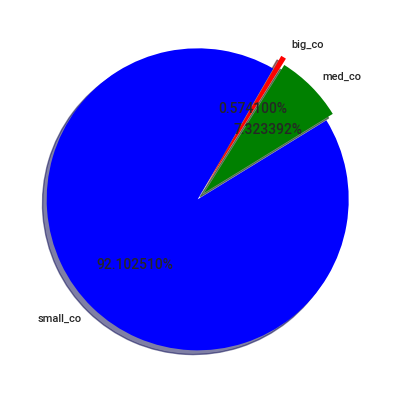

In [230]:
#Paris
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[0].plot(kind='pie', shadow=True, ax=ax, autopct='%0f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

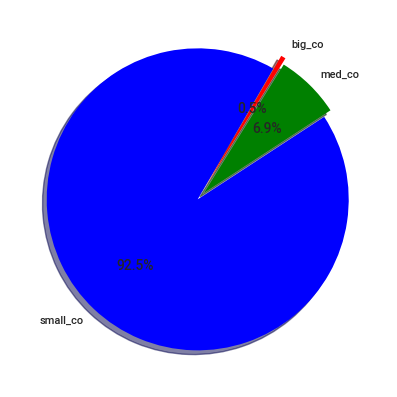

In [231]:
#Marseille
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[1].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

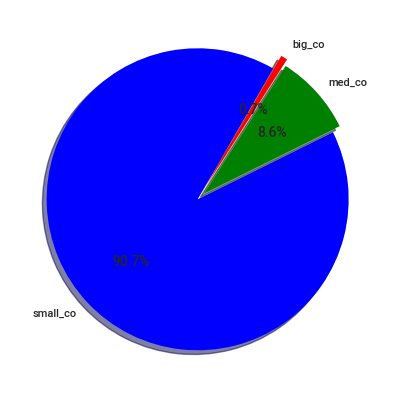

In [232]:
#Lyon
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[2].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

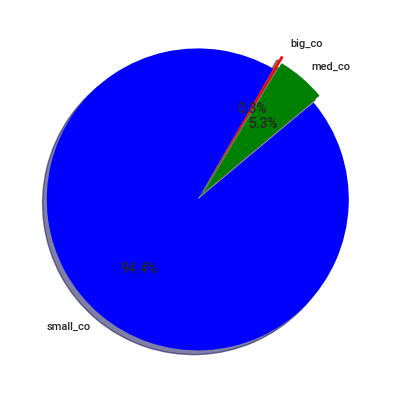

In [233]:
#Nice
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[3].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

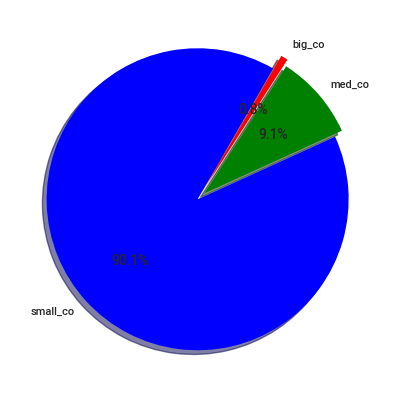

In [234]:
#Toulouse
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[4].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

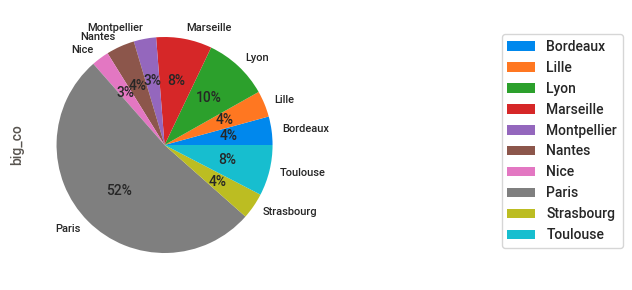

In [235]:
top_city_employ.groupby(['name_town']).sum().plot(kind='pie', y='big_co' , autopct='%1.0f%%')


plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

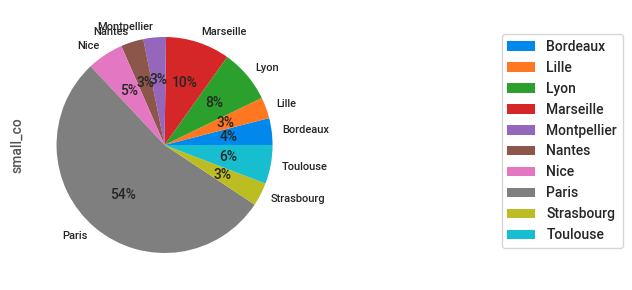

In [236]:
top_city_employ.groupby(['name_town']).sum().plot(kind='pie', y='small_co' , autopct='%1.0f%%')


plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

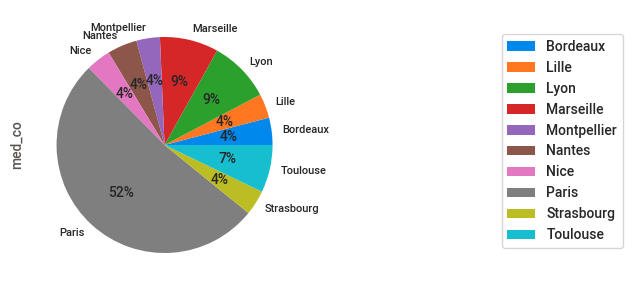

In [237]:
top_city_employ.groupby(['name_town']).sum().plot(kind='pie', y='med_co' , autopct='%1.0f%%')


plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

In [238]:
#using the "data clean" y el data original (we got the sames results)
name_max = salary_clean.groupby(['name_town']).agg({"total_firms" :"mean"})
name_max.sort_values(['total_firms'], ascending = False)[:10]


total_firms
name_town               
Paris           427385.0
Marseille        68332.0
Lyon             49756.0
Nice             39314.0
Toulouse         36823.0
Bordeaux         26116.0
Montpellier      24508.0
Nantes           22585.0
Strasbourg       20882.0
Lille            19787.0

In [239]:
name_max = salary.groupby(['name_town']).agg({"total_firms" :"mean"})
name_max.sort_values(['total_firms'], ascending = False)[:10]




total_firms
name_town               
Paris           427385.0
Marseille        68332.0
Lyon             49756.0
Nice             39314.0
Toulouse         36823.0
Bordeaux         26116.0
Montpellier      24508.0
Nantes           22585.0
Strasbourg       20882.0
Lille            19787.0

In [240]:
top_max_df = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(10).index][['name_town', 'total_firms']]
top_max_df

name_town  total_firms
30784        Paris       427385
4453     Marseille        68332
28522         Lyon        49756
2014          Nice        39314
12418     Toulouse        36823
12981     Bordeaux        26116
13633  Montpellier        24508
17075       Nantes        22585
27951   Strasbourg        20882
23381        Lille        19787

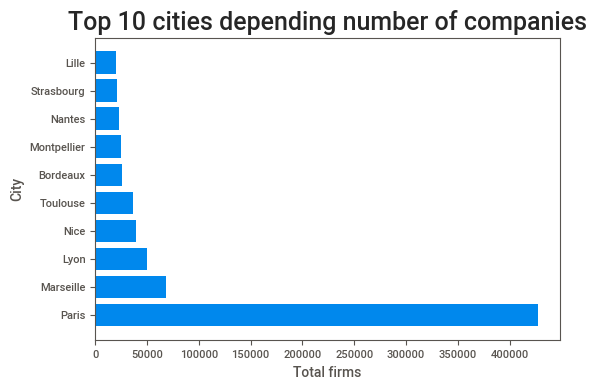

In [241]:
plt.barh(y=top_max_df['name_town'], width=top_max_df['total_firms'])
plt.title('Top 10 cities depending number of companies', fontsize=18)
plt.xlabel('Total firms')
plt.ylabel('City')
plt.show()


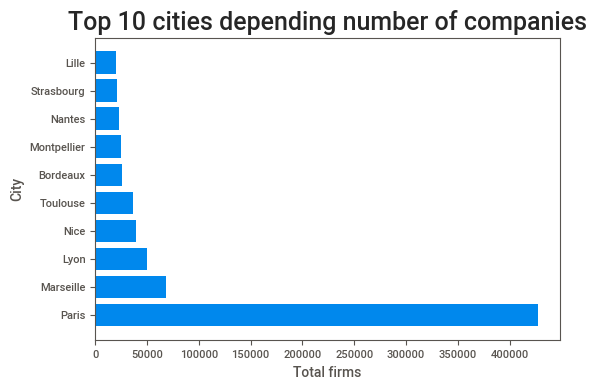

In [242]:
plt.barh(y=top_max_df['name_town'], width=top_max_df['total_firms'])
plt.title('Top 10 cities depending number of companies', fontsize=18)
plt.xlabel('Total firms')
plt.ylabel('City')
plt.show()

In [243]:
top_max_dep_df = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(20).index][['dep', 'total_firms']]
top_max_dep_df

dep  total_firms
30784   75       427385
4453    13        68332
28522   69        49756
2014    06        39314
12418   31        36823
12981   33        26116
13633   34        24508
17075   44        22585
27951   67        20882
23381   59        19787
4399    13        17626
36248   92        15403
14035   35        13669
14854   38        13207
11700   30        12166
34044   83        11849
1955    06        11763
16592   42        11663
36650  974        11550
36592  972        11503

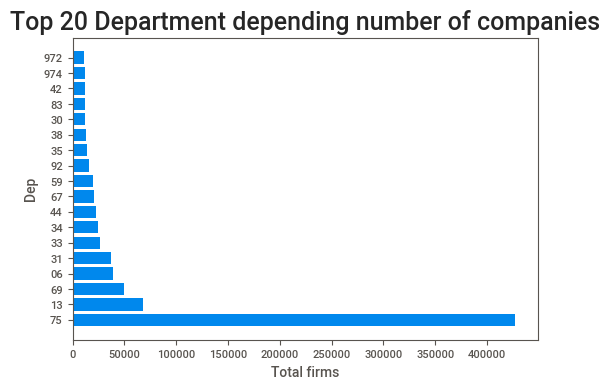

In [244]:
plt.barh(y=top_max_dep_df['dep'], width=top_max_dep_df['total_firms'])
plt.title('Top 20 Department depending number of companies', fontsize=18)
plt.xlabel('Total firms')
plt.ylabel('Dep')
plt.show()

In [245]:

top_max_20_df = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(20).index][['name_town', 'total_firms', 'big_co', 'small_co', 'med_co']]
top_max_20_df

name_town  total_firms  big_co  small_co  med_co
30784                 Paris       427385     636    102033    8113
4453              Marseille        68332     102     18299    1374
28522                  Lyon        49756     119     15148    1442
2014                   Nice        39314      32     10357     580
12418              Toulouse        36823      93     11032    1114
12981              Bordeaux        26116      52      7625     639
13633           Montpellier        24508      41      6419     553
17075                Nantes        22585      52      6454     698
27951            Strasbourg        20882      48      6645     585
23381                 Lille        19787      48      6022     569
4399        Aix-en-Provence        17626      36      4972     578
36248  Boulogne-Billancourt        15403      76      3887     511
14035                Rennes        13669      27      4445     470
14854              Grenoble        13207      26      4243     318
11700                 Nîmes        12166      18      3961     314
34044                Toulon        11849      11      3224     167
1955                 Cannes        11763       7      3326     171
16592         Saint-Étienne        11663      21      4009     382
36650           Saint-Denis        11550      17      3184     259
36592        Fort-de-France        11503      10      2360     159

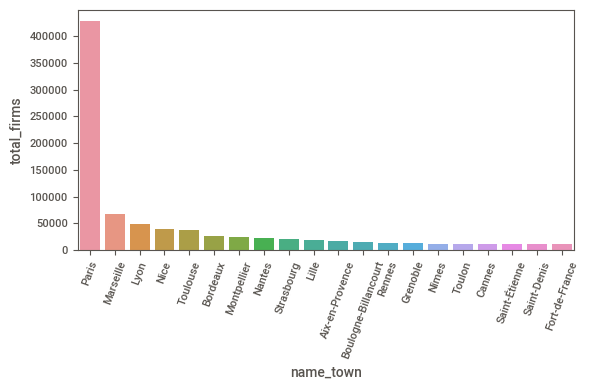

In [246]:
sns.barplot(x=top_max_20_df['name_town'], y=top_max_20_df['total_firms'])
plt.xticks(rotation=70)
plt.tight_layout()

Text(0.5, 1.0, 'Number of small and big companies depending on total companies')

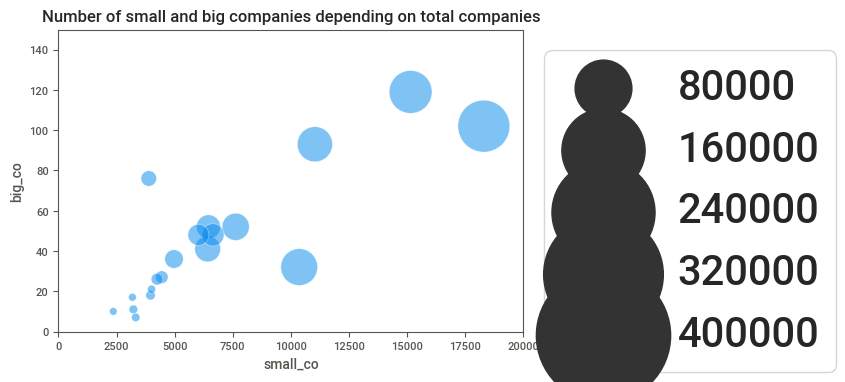

In [247]:
data = top_max_20_df

sns.scatterplot(data=data, x="small_co", y="big_co", size="total_firms", alpha=0.5, sizes=(30, 10000))
plt.xlim(0,20000)
plt.ylim(0,150)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)
sns.set_style("darkgrid")
plt.title('Number of small and big companies depending on total companies',)

Text(0.5, 1.0, 'Number of medium and big companies depending on total companies')

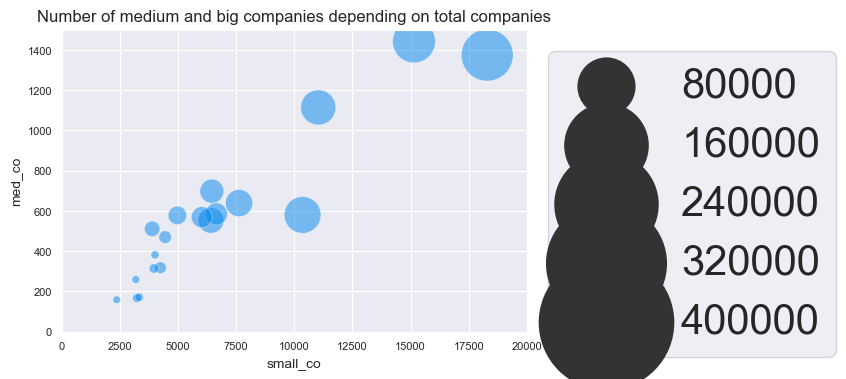

In [248]:
# data 
data = top_max_20_df

sns.scatterplot(data=data, x="small_co", y="med_co", size="total_firms", alpha=0.5, sizes=(30, 10000))
plt.xlim(0,20000)
plt.ylim(0,1500)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)
sns.set_style("darkgrid")
plt.title('Number of medium and big companies depending on total companies',)
